# Thinking like Xarray : High-level computational patterns

**Deepak Cherian, CGD**

March 9, 2022

-----

## Motivation / Learning goals

From https://toolz.readthedocs.io/en/latest/control.html
> The Toolz library contains dozens of patterns like map and groupby. Learning a core set (maybe a dozen) covers the vast majority of common programming tasks often done by hand.
> A rich vocabulary of core control functions conveys the following benefits:
>    - You identify new patterns
>    - You make fewer errors in rote coding
>    - You can depend on well tested and benchmarked implementations


The same is true for xarray

## Xarray's high-level patterns


Xarray allows you to leverage dataset metadata to write more readable analysis code. The metadata is stored with the data; not in your head.
1. Dimension names: `dim="latitude"` instead of `axis=0`
2. Coordinate "labels": or axis tick labels. `data.sel(latitude=45)` instead of `data[10]`


Xarray also provides high-level computational patterns that cover many data analysis tasks.

1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


## Load example dataset

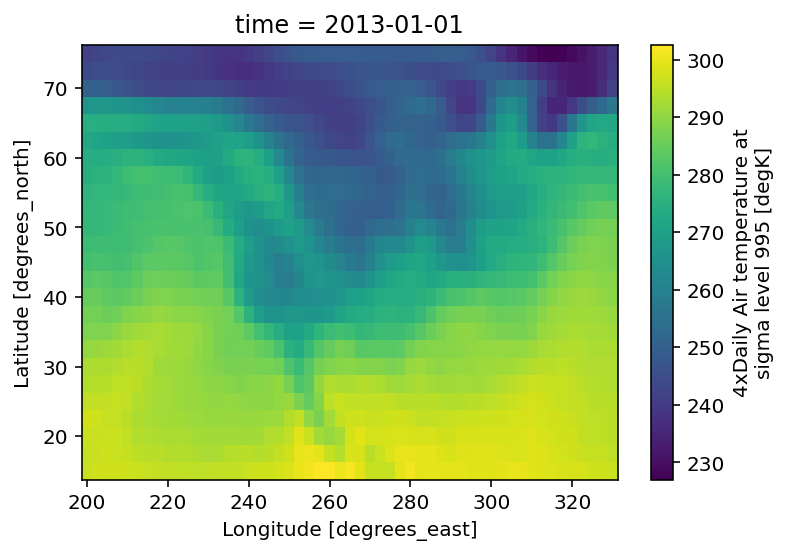

In [1]:
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True)

da = xr.tutorial.load_dataset("air_temperature", engine="netcdf4").air
monthly = da.resample(time="M").mean()
data = da.isel(time=0)
data.plot()

## Concept: "index space" vs "label space"


These are windowed operations with a window of a fixed size.

- ``rolling``: sliding window operations e.g. running mean
- ``coarsen``: decimating; reshaping

In [2]:
data

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
        238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
        239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
        241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
        294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
        295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
        296.6    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [3]:
# index space
data[10, :]  # 10th element along the first axis; ¯\_(ツ)_/¯

# index space
data.isel(lat=10)  # slightly better, 10th element in latitude

# "label" space
data.sel(lat=50)  # much better! lat=75°N

<xarray.DataArray 'air' (lon: 53)>
array([277.29   , 277.4    , 277.79   , 278.6    , 279.5    , 280.1    ,
       280.6    , 280.9    , 280.79   , 280.69998, 280.79   , 281.     ,
       280.29   , 277.69998, 273.5    , 269.     , 265.5    , 264.     ,
       265.19998, 268.1    , 269.79   , 267.9    , 263.     , 258.1    ,
       254.59999, 251.79999, 249.59999, 249.89   , 252.29999, 254.     ,
       254.29999, 255.89   , 260.     , 263.     , 261.5    , 257.29   ,
       255.5    , 258.29   , 264.     , 268.69998, 270.5    , 270.6    ,
       271.19998, 272.9    , 274.79   , 276.4    , 278.19998, 280.5    ,
       282.9    , 284.69998, 286.1    , 286.9    , 286.6    ],
      dtype=float32)
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [4]:
# What I wanted to do
data.sel(lat=50)

# What I had to do (if I wasn't using xarray)
data[10, :]

<xarray.DataArray 'air' (lon: 53)>
array([277.29   , 277.4    , 277.79   , 278.6    , 279.5    , 280.1    ,
       280.6    , 280.9    , 280.79   , 280.69998, 280.79   , 281.     ,
       280.29   , 277.69998, 273.5    , 269.     , 265.5    , 264.     ,
       265.19998, 268.1    , 269.79   , 267.9    , 263.     , 258.1    ,
       254.59999, 251.79999, 249.59999, 249.89   , 252.29999, 254.     ,
       254.29999, 255.89   , 260.     , 263.     , 261.5    , 257.29   ,
       255.5    , 258.29   , 264.     , 268.69998, 270.5    , 270.6    ,
       271.19998, 272.9    , 274.79   , 276.4    , 278.19998, 280.5    ,
       282.9    , 284.69998, 286.1    , 286.9    , 286.6    ],
      dtype=float32)
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Xarray provides high-level patterns in both "index space" and  "label space"

#### Index space
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
   
#### Label space
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)

## Index space: windows of fixed width


### Sliding windows of fixed length: ``rolling``

- returns object of same shape as input
- pads with NaNs to make this happen
- supports multiple dimensions

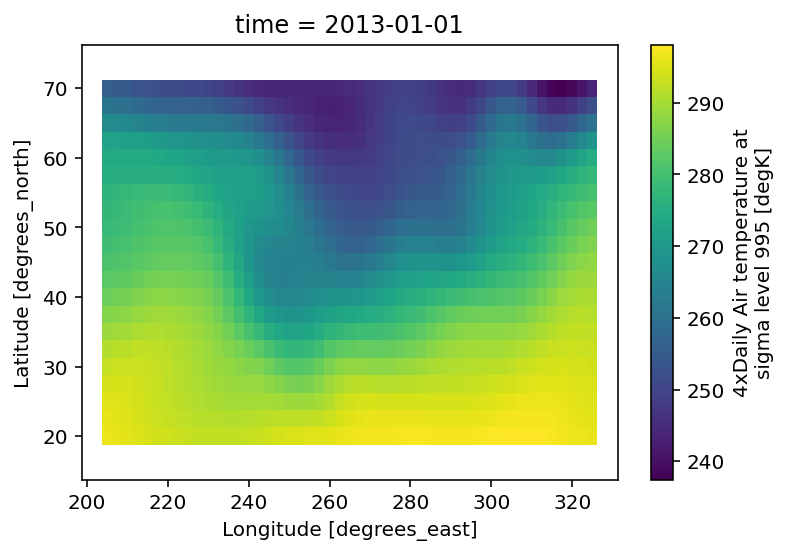

In [5]:
data.rolling(lat=5, lon=5, center=True).mean().plot()

#### Apply an existing numpy-only function with ``reduce``

Here's an example function: `np.ptp`

In [6]:
np.ptp?

Signature: np.ptp(a, axis=None, out=None, keepdims=<no value>)
Docstring:
Range of values (maximum - minimum) along an axis.

The name of the function comes from the acronym for 'peak to peak'.

.. warning::
    `ptp` preserves the data type of the array. This means the
    return value for an input of signed integers with n bits
    (e.g. `np.int8`, `np.int16`, etc) is also a signed integer
    with n bits.  In that case, peak-to-peak values greater than
    ``2**(n-1)-1`` will be returned as negative values. An example
    with a work-around is shown below.

Parameters
----------
a : array_like
    Input values.
axis : None or int or tuple of ints, optional
    Axis along which to find the peaks.  By default, flatten the
    array.  `axis` may be negative, in
    which case it counts from the last to the first axis.

    .. versionadded:: 1.15.0

    If this is a tuple of ints, a reduction is performed on multiple
    axes, instead of a single axis or all the axes as before.
out : ar

**Exercise** Calculate the rolling peak-to-peak amplitude in 5 point bins along both latitude and longitude

Answer:

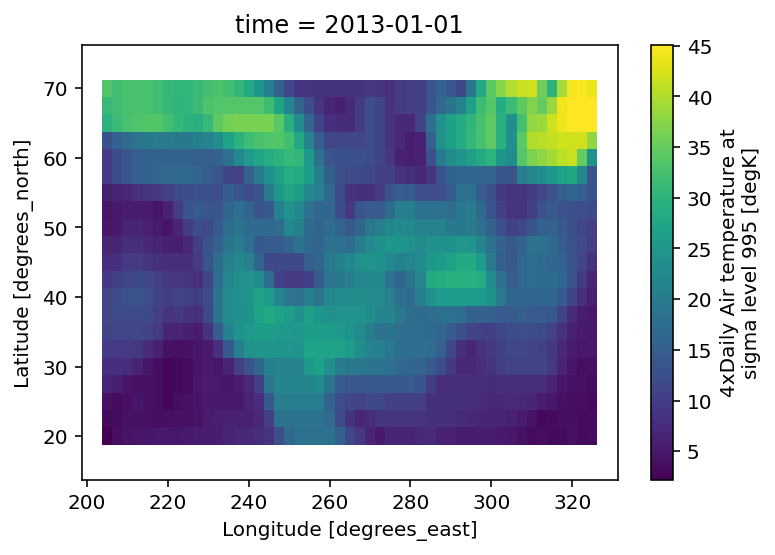

In [7]:
data.rolling(lat=5, lon=5, center=True).reduce(np.ptp).plot()

#### For more complicated analysis, construct a new array with a new dimension.
Allows things like short-time fourier transform, spectrogram, windowed rolling etc.

In [8]:
simple = xr.DataArray(np.arange(10), dims="time", coords={"time": np.arange(10)})

# adds a new dimension "window"
simple.rolling(time=5, center=True).construct("window")

<xarray.DataArray (time: 10, window: 5)>
array([[nan, nan,  0.,  1.,  2.],
       [nan,  0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 2.,  3.,  4.,  5.,  6.],
       [ 3.,  4.,  5.,  6.,  7.],
       [ 4.,  5.,  6.,  7.,  8.],
       [ 5.,  6.,  7.,  8.,  9.],
       [ 6.,  7.,  8.,  9., nan],
       [ 7.,  8.,  9., nan, nan]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: window

``construct`` is clever. It constructs a **view** of the original array, so it is memory-efficient. but you didn't have to know that

**Exercise** Calculate the 5 point running mean in time using `rolling.construct`

Answer

In [9]:
(
    simple
    .rolling(time=5, center=True)
    .construct("window")
    .mean("window")
)

<xarray.DataArray (time: 10)>
array([1. , 1.5, 2. , 3. , 4. , 5. , 6. , 7. , 7.5, 8. ])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

#### Another ``construct`` example

This is a 2D rolling example; we need to provide two new dimension names

In [10]:
(
    data
    .rolling(lat=5, lon=5, center=True)
    .construct(lat="lat_roll", lon="lon_roll")
)

<xarray.DataArray 'air' (lat: 25, lon: 53, lat_roll: 5, lon_roll: 5)>
array([[[[      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan, 241.2    , 242.5    , 243.5    ],
         [      nan,       nan, 243.79999, 244.5    , 244.7    ],
         [      nan,       nan, 250.     , 249.79999, 248.89   ]],

        [[      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan],
         [      nan, 241.2    , 242.5    , 243.5    , 244.     ],
         [      nan, 243.79999, 244.5    , 244.7    , 244.2    ],
         [      nan, 250.     , 249.79999, 248.89   , 247.5    ]],

        [[      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan],
         [241.2    , 242.5    , 243.5    , 244.     , 244.09999],
         [243.79999, 244.5    , 244.7    , 244.2    , 243.39   ],
         [250.     , 249.79999, 248.89   , 247.5    , 246.     ]],

        ...,

...
        ...,

        [[296.69998, 295.79   , 295.4    , 295.1    , 294.69998],
         [296.9    , 296.29   , 295.9    , 295.9    , 295.19998],
         [297.79   , 297.6    , 296.9    , 296.79   , 296.6    ],
         [      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan]],

        [[295.79   , 295.4    , 295.1    , 294.69998,       nan],
         [296.29   , 295.9    , 295.9    , 295.19998,       nan],
         [297.6    , 296.9    , 296.79   , 296.6    ,       nan],
         [      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan]],

        [[295.4    , 295.1    , 294.69998,       nan,       nan],
         [295.9    , 295.9    , 295.19998,       nan,       nan],
         [296.9    , 296.79   , 296.6    ,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan],
         [      nan,       nan,       nan,       nan,       nan]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Dimensions without coordinates: lat_roll, lon_roll
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Block windows of fixed length: ``coarsen``

For non-overlapping windows or "blocks" use ``coarsen``. The syntax is very similar to `rolling`. You will need to specify ``boundary`` if the length of the dimension is not a multiple of the block size

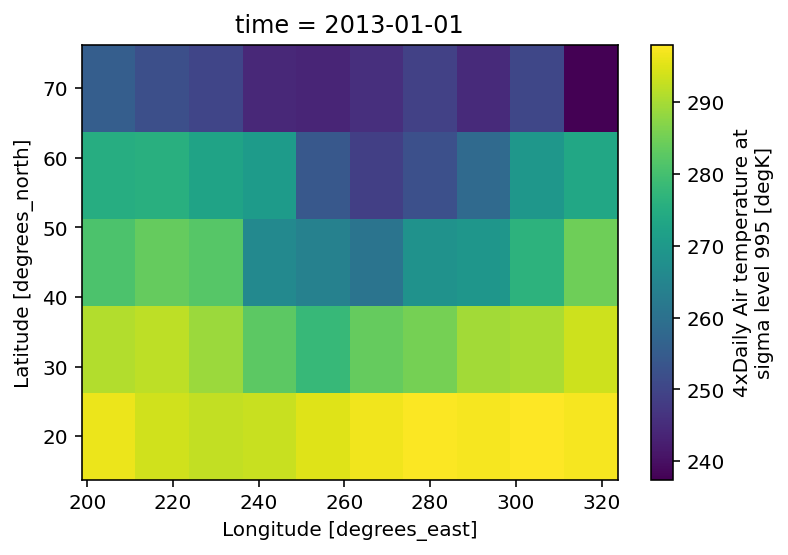

In [11]:
(
    data
    .coarsen(lat=5, lon=5, boundary="trim")
    .mean()
    .plot()
)

#### coarsen supports ``reduce`` for custom reductions

**Exercise** Use ``coarsen.reduce`` to apply `np.ptp` in 5x5 (latxlon) point blocks of `data`

Answer

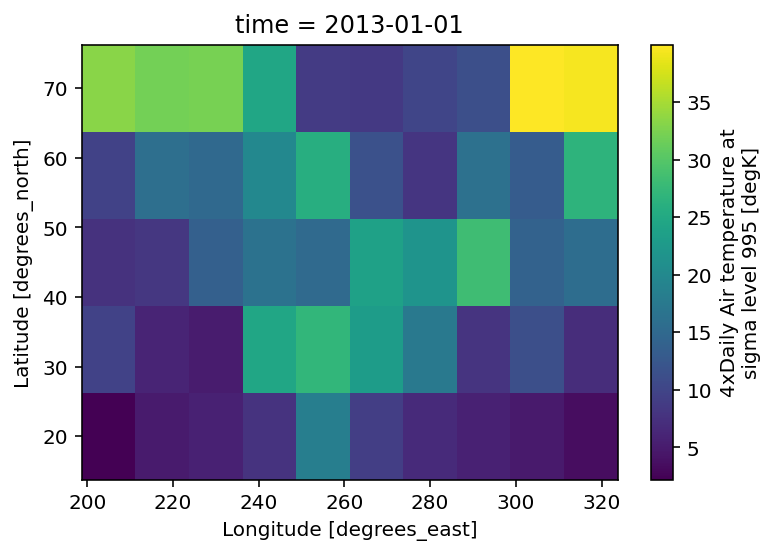

In [12]:
(
    data.coarsen(lat=5, lon=5, boundary="trim")
    .reduce(np.ptp)
    .plot()
)

#### coarsen supports ``construct`` for block reshaping

This is usually a good alternative to `np.reshape`

A simple example

In [13]:
months = xr.DataArray(np.tile(np.arange(1, 13), reps=2), dims="time", coords={"time": np.arange(1,25)})
months

<xarray.DataArray (time: 24)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24

In [14]:
months.coarsen(time=12).construct(time=("year", "month"))

<xarray.DataArray (year: 2, month: 12)>
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])
Coordinates:
    time     (year, month) int64 1 2 3 4 5 6 7 8 9 ... 17 18 19 20 21 22 23 24
Dimensions without coordinates: year, month

Note two things:
1. The `time` dimension was also reshaped.
1. The new dimensions `year` and `month` don't have any coordinate labels associated with them.

**Exercise** Reshape the `time` dimension of `monthly` to year x month and visualize the seasonal cycle for two years at 250°E

Answer

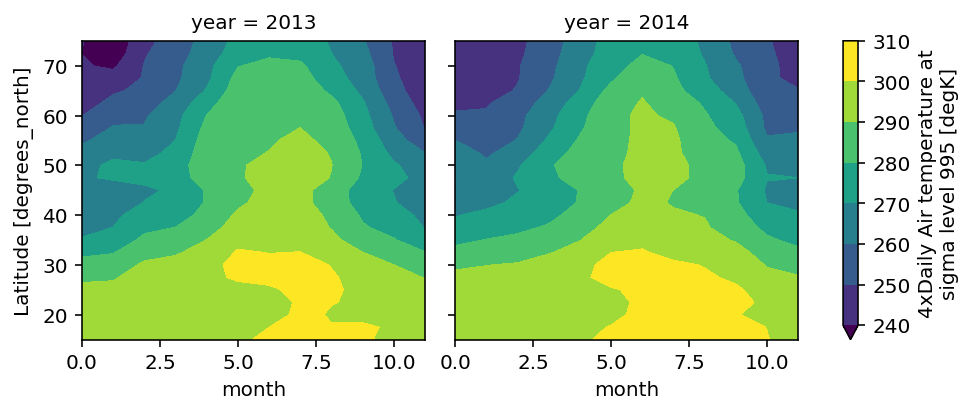

In [15]:
# splits time dimension into year x month
year_month = monthly.coarsen(time=12).construct(time=("year", "month"))
year_month["year"] = np.unique(monthly.time.dt.year)
# seasonal cycle for two years
year_month.sel(lon=250).plot.contourf(col="year", x="month", y="lat", robust=True)

## Label space "windows" or bins : GroupBy

Generalization of ``coarsen``: sometimes the windows you want are not regular.

- ``groupby``: e.g. climatologies, composites; works when "groups" are exact: e.g. characters or integers; not floats
- ``groupby_bins``: binning operations e.g. histograms
- ``resample``: groupby but specialized for time grouping (so far)

**tip** Both `groupby_bins` and `resample` are implemented as `GroupBy` with a specific way of constructing group labels.


### Deconstructing GroupBy


Commonly called "split-apply-combine". 

1. "split" : break dataset into groups
1. "apply" : apply an operation, usually a reduction like `mean`
1. "combine" : concatenate results from apply step along new "group" dimension

But really there is a first step: "identifying groups" also called "factorization". Usually this is the hard part




### Constructing group labels

These functions are useful for constructing "group labels" in many cases

1. [``numpy.digitize``](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) (binning)
1. [``numpy.searchsorted``](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html) supports many other data types
1. [``pandas.factorize``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) supports characters, strings etc.
1. [``pandas.cut``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for binning


Xarray uses `pandas.factorize` for `groupby` and `pandas.cut` for `groupby_bins`

#### More commonly useful are ["datetime components"](https://xarray.pydata.org/en/stable/user-guide/time-series.html#datetime-components)

Accessed using ``DataArray.dt.*``

In [16]:
da.time.dt.day

<xarray.DataArray 'day' (time: 2920)>
array([ 1,  1,  1, ..., 31, 31, 31])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [17]:
da.time.dt.month

<xarray.DataArray 'month' (time: 2920)>
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [18]:
da["time.month"]

<xarray.DataArray 'month' (time: 2920)>
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

#### `floor`, `ceil` and `round` time

In [19]:
# remove roundoff error in timestamps
# floor to daily frequency
da.time.dt.floor("D")

<xarray.DataArray 'floor' (time: 2920)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

#### `strftime` can be extremely useful

So useful and so unintuitive that it has its own website: https://strftime.org/

In [20]:
da.time.dt.strftime("%b-%d")

<xarray.DataArray 'strftime' (time: 2920)>
array(['Jan-01', 'Jan-01', 'Jan-01', ..., 'Dec-31', 'Dec-31', 'Dec-31'],
      dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

### Simple Examples

#### groupby

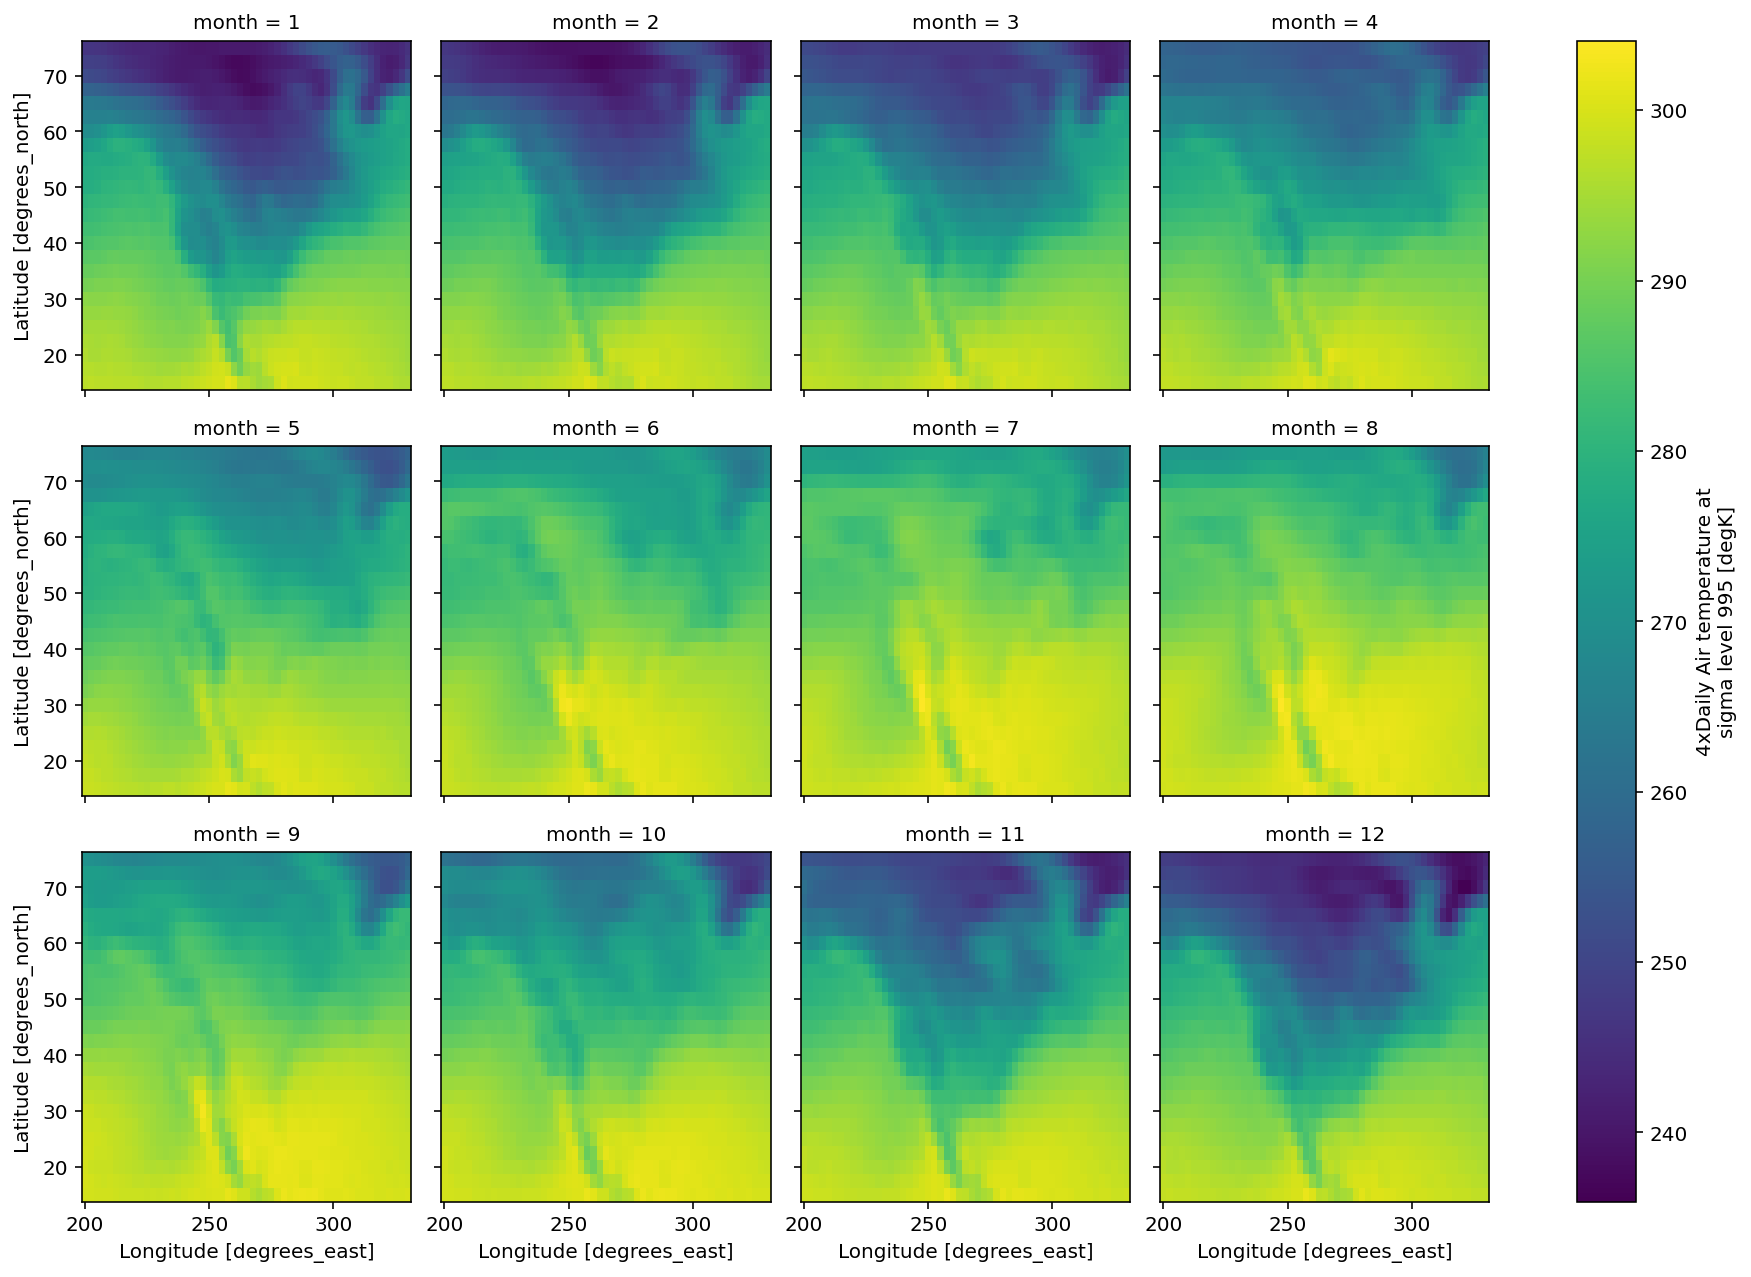

In [21]:
(da.groupby("time.month").mean().plot(col="month", col_wrap=4))

#### groupby_bins

Like groupby but now the groups are bins. Useful for histogramming / grouping by `float` variables

In [22]:
binned = data.groupby_bins("lat", bins=[20, 35, 40, 45, 50])
binned

DataArrayGroupBy, grouped over 'lat_bins'
4 groups with labels (45.0,, 50.0], ..., (20.0,, 35.0].

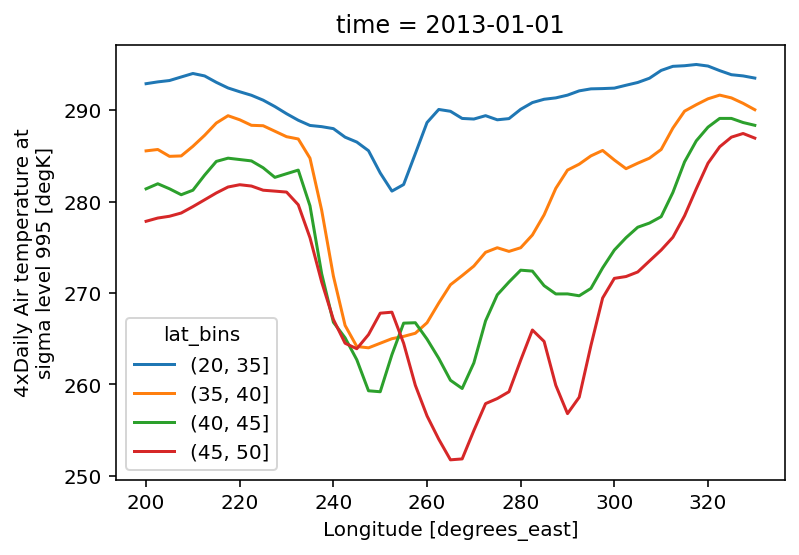

In [23]:
binned.mean().plot.line(hue="lat_bins")

#### resample

groupby but specialized for time-grouping to a specified frequency

Simple frequency strings are `"D"` for Day, `"M"` for MonthEnd , `"A"` for Annual etc.

More complicated frequency strings are [available](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases), thanks to Pandas.

All these work with CFTime and Datetime (so all calendars are supported)

In [24]:
da.resample(time="M").mean()

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53)>
array([[[244.4667 , 244.66354, 244.67027, ..., 242.49142, 243.40633,
         244.67577],
        [247.07323, 247.02248, 246.7275 , ..., 240.58205, 242.04489,
         244.70726],
        [250.37941, 249.83484, 249.10748, ..., 241.98434, 244.76712,
         249.00505],
        ...,
        [295.83795, 295.15085, 294.9229 , ..., 295.36826, 294.88437,
         294.26828],
        [296.46942, 296.31686, 295.84802, ..., 295.5876 , 295.34058,
         294.86536],
        [297.05316, 297.0418 , 296.73517, ..., 296.30438, 296.09732,
         296.0389 ]],

       [[240.73384, 240.7013 , 240.4115 , ..., 241.60518, 242.71988,
         243.94455],
        [241.93309, 242.06935, 241.913  , ..., 241.01428, 242.32481,
         244.72758],
        [245.32361, 245.0261 , 244.36955, ..., 243.41588, 245.7661 ,
         249.65858],
...
        [298.04895, 297.35007, 297.22195, ..., 298.01172, 297.66013,
         297.14554],
        [298.96484, 298.81186, 298.27136, ..., 298.10403, 298.22104,
         297.88547],
        [299.17334, 299.2175 , 298.89566, ..., 298.71625, 298.74167,
         298.7802 ]],

       [[246.80156, 246.88907, 246.76907, ..., 240.07089, 241.08206,
         242.2817 ],
        [247.72998, 248.30064, 248.74443, ..., 238.61859, 240.3222 ,
         242.97026],
        [249.96893, 249.58516, 249.57521, ..., 237.70308, 241.23743,
         246.22667],
        ...,
        [296.4491 , 295.6914 , 295.75824, ..., 296.52817, 296.21747,
         295.8128 ],
        [297.44586, 297.43613, 297.1817 , ..., 296.95242, 297.05823,
         296.72897],
        [298.0472 , 298.22598, 298.0595 , ..., 297.6975 , 297.72318,
         297.71024]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Looping over groupby objects is possible

Maybe you want to plot data in each group separately?

In [25]:
for label, group in da.groupby("time.month"):
    print(label)

1
2
3
4
5
6
7
8
9
10
11
12


This is a DataArray contain data for all December days

In [26]:
group

<xarray.DataArray 'air' (time: 248, lat: 25, lon: 53)>
array([[[268.79   , 266.6    , 263.79   , ..., 238.2    , 239.39   ,
         240.39   ],
        [268.29   , 265.69998, 262.5    , ..., 239.7    , 240.89   ,
         242.29999],
        [265.     , 261.9    , 258.9    , ..., 239.     , 240.89   ,
         243.59999],
        ...,
        [298.19998, 298.1    , 298.19998, ..., 298.19998, 298.1    ,
         297.79   ],
        [298.     , 297.9    , 298.     , ..., 298.79   , 298.6    ,
         298.4    ],
        [297.69998, 297.6    , 297.5    , ..., 299.     , 299.4    ,
         299.4    ]],

       [[271.79   , 270.69998, 268.9    , ..., 237.59999, 238.2    ,
         238.89   ],
        [271.69998, 271.     , 269.4    , ..., 238.2    , 239.2    ,
         240.5    ],
        [266.9    , 265.     , 263.     , ..., 237.89   , 239.89   ,
         242.39   ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-12-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### In most cases, avoid a for loop using ``map``

Apply functions that expect xarray Datasets or DataArrays.

Avoid having to manually combine results using concat

In [27]:
def iqr(da):
    """ Calculates interquartile range """
    return (da.quantile(q=0.75) - da.quantile(q=0.25)).rename("iqr")


da.groupby("time.month").map(iqr)

<xarray.DataArray 'iqr' (month: 12)>
array([35.3999939 , 35.1000061 , 31.09997559, 25.        , 19.59997559,
       15.39001465, 13.70999146, 14.29998779, 19.09997559, 22.59997559,
       29.01000977, 35.61001587])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### groupby supports `reduce` for custom reductions

This applies to `groupby_bins` and `resample`

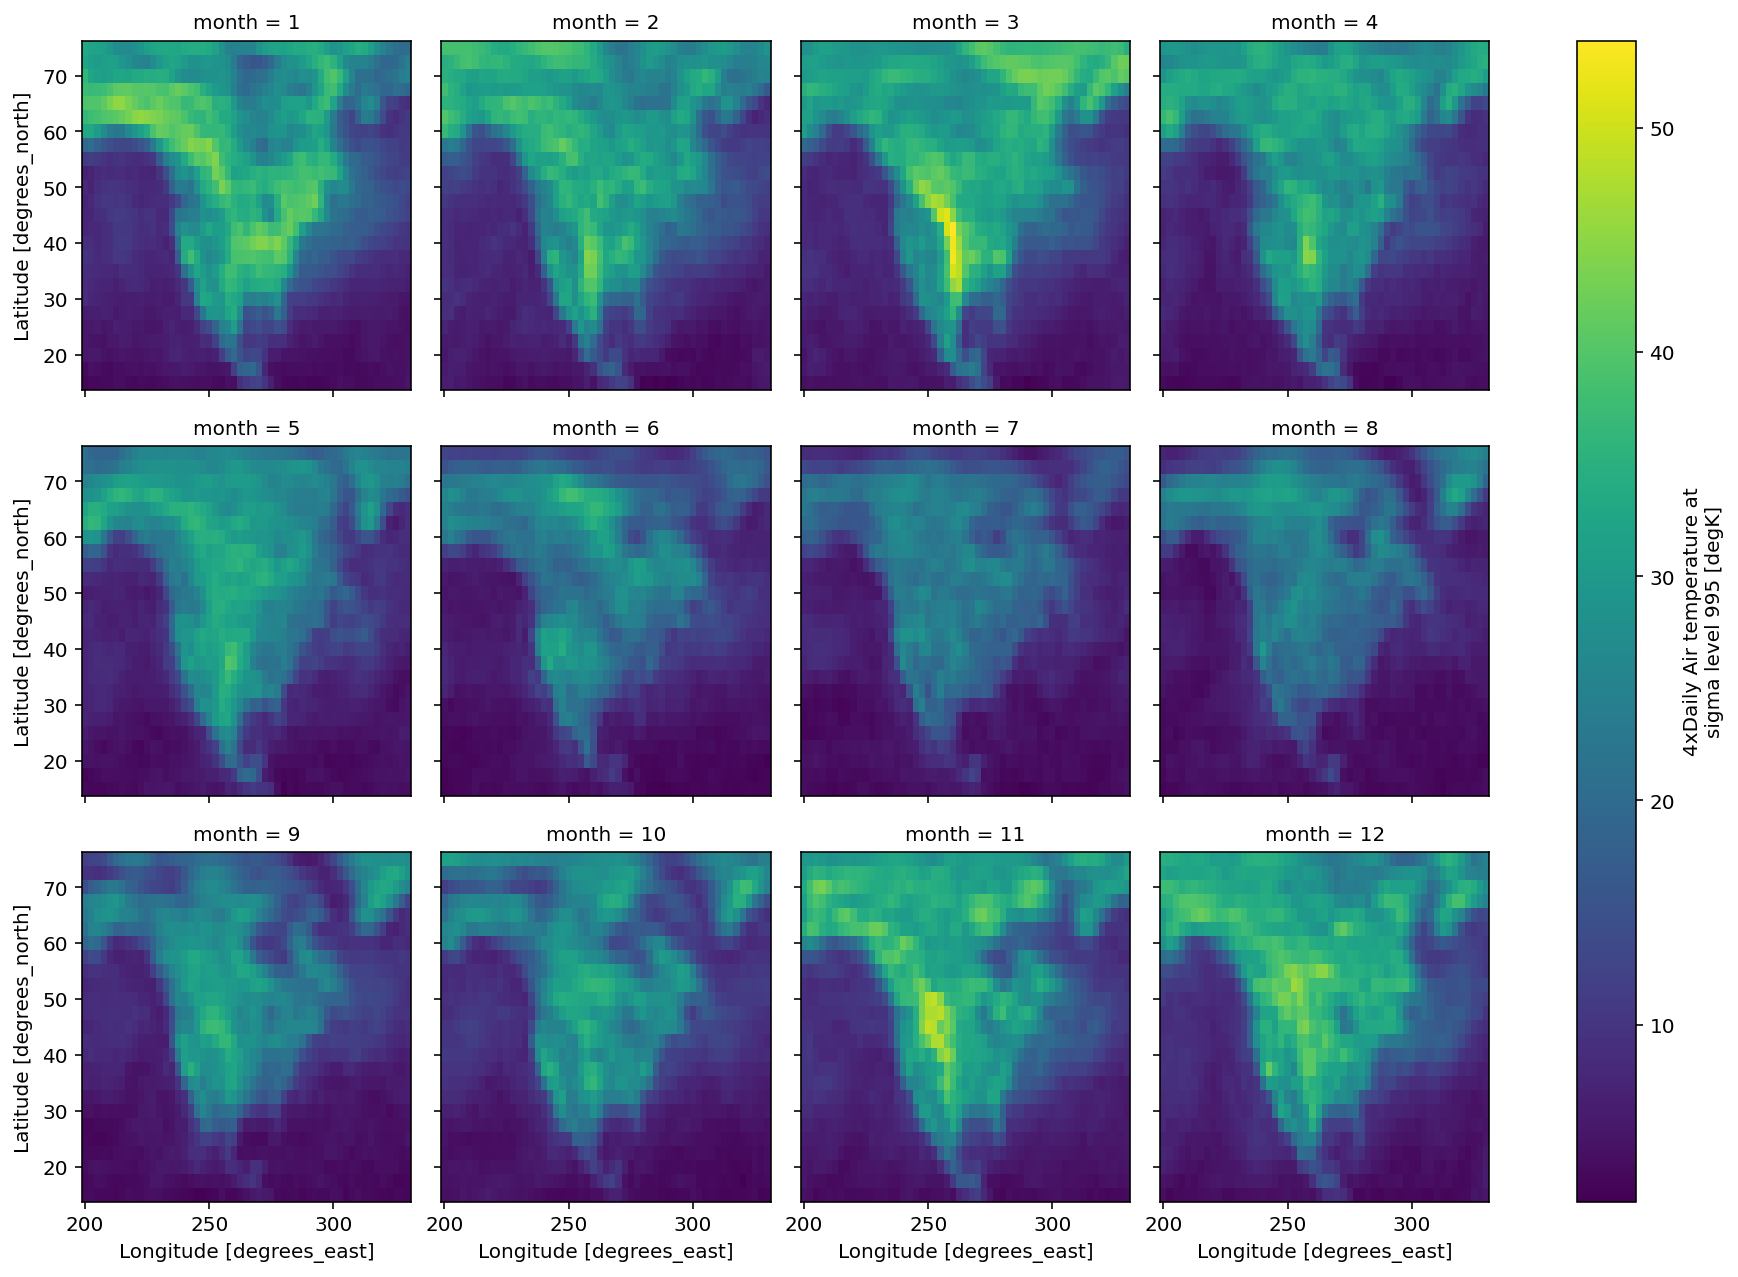

In [28]:
(
    da.groupby("time.month")
    .reduce(np.ptp)
    .plot(col="month", col_wrap=4)
)

**tip** `map` is for functions that expect and return xarray objects (see also ``Dataset.map``). `reduce` is for functions that expect and return plain arrays (like numpy or scipy functions)

---

## Summary

Xarray provides methods for high-level analysis patterns:
1. `rolling` :
   [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
1. `coarsen` :
   [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
1. `groupby` :
   [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
1. `groupby_bins`: GroupBy after discretizing a numeric variable.
1. `resample` :
   [Groupby specialized for time axes. Either downsample or upsample your data.](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations)
1. `weighted` :
   [Weight your data before reducing](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


## More resources

1. More tutorials here:https://xarray-contrib.github.io/xarray-tutorial/
1. Answers to common questions on "how to do X" are here: https://xarray.pydata.org/en/stable/howdoi.html